In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# P1 - Determine an approximate mathematical equation for curve B. 

temps = np.linspace(0., 60., 200)

# Points from graph
growth_temps = np.array([5., 10., 22., 30., 40.])
growth_vals = np.array([0., 45., 100., 82., 0.])

# Calculate 3rd order polynomial fit
p_b = np.polyfit(growth_temps, growth_vals, 3)
curve_b = np.polyval(p_b, temps)

In [13]:
# P2 - Assume curves A and A1 can be approximated by straight lines. Come up with the equations
# for those two curves.

# Points from graph
a_temps = np.array([0., 47.])
a_vals = np.array([100., 0.])

a1_temps = np.array([0., 40.])
a1_vals = np.array([80., 0.])

# Calculate 1st order polynomial fits
p_a = np.polyfit(a_temps, a_vals, 1)
curve_a = np.polyval(p_a, temps)

p_a1 = np.polyfit(a1_temps, a1_vals, 1)
curve_a1 = np.polyval(p_a1, temps)

In [37]:
# P3 and 4 Calculate intersection of points

def find_intersections(curve_a, curve_b):
    """
    Find intersections of growth curves
    
    :param curve_a: 
    :param curve_b: 
    :return: 
    """
    
    # https://stackoverflow.com/questions/28766692/intersection-of-two-graphs-in-python-find-the-x-value
    x_vals = np.argwhere(np.diff(np.sign(curve_a - curve_b))).flatten()
    
    return x_vals

a_x_vals = find_intersections(curve_a, curve_b)
a1_x_vals = find_intersections(curve_a1, curve_b)

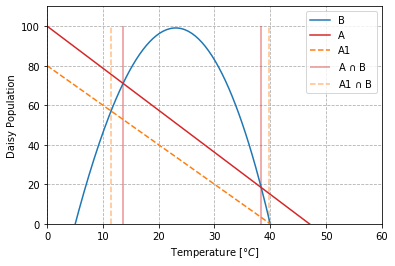

In [46]:
fig, ax = plt.subplots()
a_color = 'C3'
a1_color = 'C1'

# Plot out curves
ax.plot(temps, curve_b, color='C0', label='B')
ax.plot(temps, curve_a, color=a_color, label='A')
ax.plot(temps, curve_a1, color=a1_color, ls='--', label='A1')

ax.set_xlim(0., 60.)
ax.set_ylim(0., 110.)

ax.set_xlabel(r'Temperature [$\degree C$]')
ax.set_ylabel('Daisy Population')

ax.vlines(temps[a_x_vals], 0, 100, color=a_color, alpha=.5, label=r'A $\cap$ B')
ax.vlines(temps[a1_x_vals], 0, 100, color=a1_color, alpha=.5, ls='--', label='A1 $\cap$ B')

ax.legend()
ax.grid(ls='--')

fig.savefig('daisyworld_example.png', dpi=300., transparent=True)
